In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import os

In [2]:
def func_signal(t, A1=0.3, A2=23.8, A3=1.59, tau1=3.9, tau2=1.13, tau3=22.20, tau4=0.251):
    """Computes the value of the function f(t) that represents a photon with given parameters, only for t >= 0."""
    t = np.maximum(t, 0)  # Ensures that there are no negative time offsets
    term1 = A1 * (1 - np.exp(-t / tau1))
    term2 = A2 * np.exp(-t / tau2)
    term3 = A3 * np.exp(-t / tau3)
    term4 = np.exp(-t / tau4)
    return term1 * (term2 + term3 + term4)


def generate_offsets(n, scale):
    """Generate n random offsets using an exponential distribution with a given rate."""
    return np.random.exponential(scale=scale, size=n)

def generate_custom_offsets(n, tau1=3.5, tau2=3.7):
    """
    Generate n random offsets using the custom distribution combining two exponential distributions.
    
    Args:
    - n: Number of offsets to generate.
    - tau1: Parameter for the first exponential term (related to rate1).
    - tau2: Parameter for the second exponential term (related to rate2).
    
    Returns:
    - offsets: An array of generated offsets.
    """
    
    # Calculate the rates (inverse of tau)
    scale1 = tau1
    scale2 = tau2
    
    # Generate samples from the exponential distributions
    offsets1 = generate_offsets(n, scale1)
    offsets2 = generate_offsets(n, scale2)
    
    # Combine the samples as described
    combined_offsets = (offsets1 + offsets2)

    return combined_offsets

In [3]:
def export_data_combined(t_values, summed_values, n_photons):
    # Create 'Combined_photons' directory if it doesn't exist
    if not os.path.exists('Combined_photons'):
        os.makedirs('Combined_photons')
        
    filename = f"Combined_photons/photon_data_{n_photons}_combined.txt"
    with open(filename, 'w') as file:
        for t, value in zip(t_values, summed_values):
            file.write(f"{t}, {value}\n")  # Comma-separated values. Change to "\t" for tab-separated.


def export_data_combined_variable_tau(t_values, summed_values, n_photons, tau):
    # Create 'Combined_photons_tau_{tau}' directory if it doesn't exist
    directory = f'Combined_photons_tau_{tau}'
    if not os.path.exists(directory):
        os.makedirs(directory)
        
    filename = f"{directory}/photon_data_{n_photons}_combined_tau_{tau}.txt"
    with open(filename, 'w') as file:
        for t, value in zip(t_values, summed_values):
            file.write(f"{t}, {value}\n")  # Comma-separated values. Change to "\t" for tab-separated.

def simulate_photon_data_combined(n_photons):
    random_offsets = generate_custom_offsets(n_photons)
    #print(random_offsets)
    t_values = np.linspace(0, 150, 3000)
    summed_values = np.zeros_like(t_values)
    A1 = norm.rvs(loc=0.3, scale=0.01)
    A2 = norm.rvs(loc=23.8, scale=0.2)
    A3 = norm.rvs(loc=1.59, scale=0.01)
    tau1 = norm.rvs(loc=3.9, scale=0.2)
    tau2 = norm.rvs(loc=1.13, scale=0.02)
    tau3 = norm.rvs(loc=22.20, scale=0.4)
    tau4 = norm.rvs(loc=0.251, scale=0.005)

    for offset in random_offsets:
        individual_values = func_signal(t_values - offset, A1, A2, A3, tau1, tau2, tau3, tau4)/1000
        summed_values += individual_values

    t_values = t_values * (10 ** -9)
    export_data_combined(t_values, summed_values, n_photons)
    return t_values, summed_values


def simulate_photon_data_combined_variable_tau(n_photons, tau):
    random_offsets = generate_custom_offsets(n_photons, tau1=tau)
    #print(random_offsets)
    t_values = np.linspace(0, 150, 3000)
    summed_values = np.zeros_like(t_values)
    A1 = norm.rvs(loc=0.3, scale=0.01)
    A2 = norm.rvs(loc=23.8, scale=0.2)
    A3 = norm.rvs(loc=1.59, scale=0.01)
    tau1 = norm.rvs(loc=3.9, scale=0.2)
    tau2 = norm.rvs(loc=1.13, scale=0.02)
    tau3 = norm.rvs(loc=22.20, scale=0.4)
    tau4 = norm.rvs(loc=0.251, scale=0.005)

    for offset in random_offsets:
        individual_values = func_signal(t_values - offset, A1, A2, A3, tau1, tau2, tau3, tau4)/1000
        summed_values += individual_values

    t_values = t_values * (10 ** -9)
    export_data_combined_variable_tau(t_values, summed_values, n_photons, tau)
    return t_values, summed_values

def concatenate_and_export(photons_list, time_gap_ns=500):
    all_t_values = []
    all_summed_values = []
    current_time = 0

    for n in photons_list:
        t_values, summed_values = simulate_photon_data_combined(n)
        t_values += current_time
        all_t_values.extend(t_values)
        all_summed_values.extend(summed_values)
        current_time = t_values[-1] + time_gap_ns * 1e-9  # Convert ns to s for the time gap

    filename = f"combined_photon_data_{len(photons_list)}.txt"
    with open(filename, 'w') as file:
        for t, value in zip(all_t_values, all_summed_values):
            file.write(f"{t}, {value}\n")


    return all_t_values, all_summed_values


def concatenate_and_export_variable_tau(photons_list, tau, time_gap_ns=500):
    all_t_values = []
    all_summed_values = []
    current_time = 0

    for n in photons_list:
        t_values, summed_values = simulate_photon_data_combined_variable_tau(n, tau)
        t_values += current_time
        all_t_values.extend(t_values)
        all_summed_values.extend(summed_values)
        current_time = t_values[-1] + time_gap_ns * 1e-9  # Convert ns to s for the time gap

    filename = f"combined_photon_data_{len(photons_list)}_tau_{tau}.txt"
    with open(filename, 'w') as file:
        for t, value in zip(all_t_values, all_summed_values):
            file.write(f"{t}, {value}\n")


    return all_t_values, all_summed_values

In [4]:
# Generate a sequence of numbers from 1 to 50
sequence = np.linspace(1, 50, 50)
photons_list = sequence.astype(int)

all_t_values, all_summed_values = concatenate_and_export(photons_list)

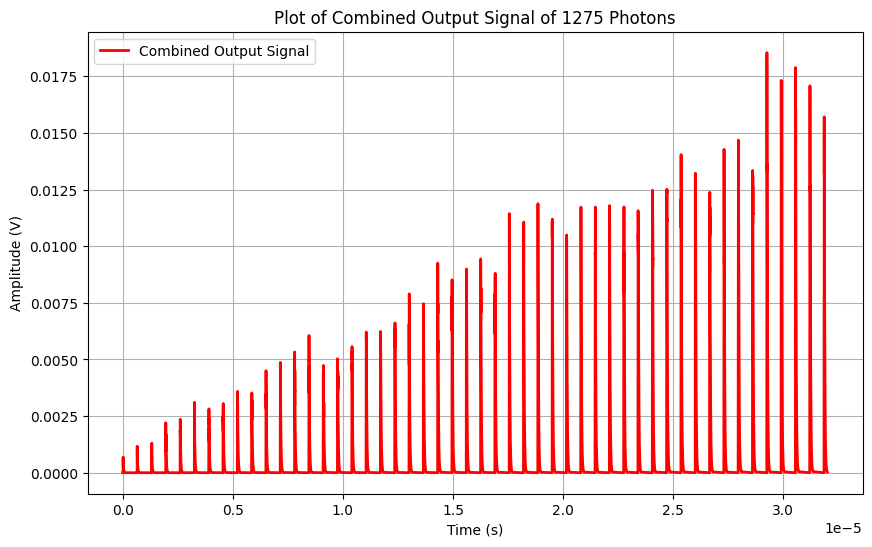

In [5]:
# Plot the combined data
plt.figure(figsize=(10, 6))
plt.plot(all_t_values, all_summed_values, color='red', label='Combined Output Signal', linewidth=2)
plt.title(f'Plot of Combined Output Signal of {sum(photons_list)} Photons')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (V)')
#plt.xlim(0.9*10**-5, 1.1*10**-5)
#plt.xlim(3.055*10**(-5), 3.057*10**(-5))
#plt.xlim(3.185*10**(-5), 3.188*10**(-5))
plt.grid(True)
plt.legend()
plt.show()


In [6]:
# Generate a sequence of numbers from 1 to 50
sequence = np.linspace(1, 50, 50)
photons_list = sequence.astype(int)

tau_var = 10

all_t_values, all_summed_values = concatenate_and_export_variable_tau(photons_list, tau_var)

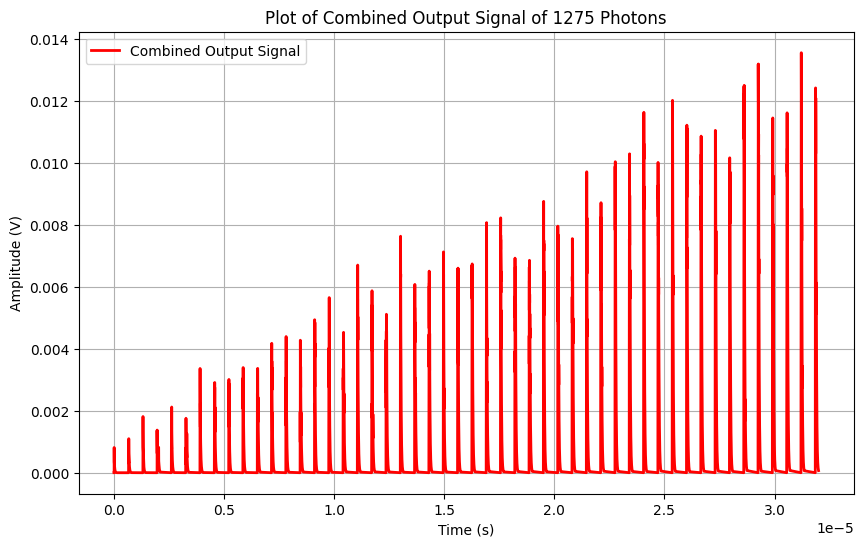

In [7]:
# Plot the combined data
plt.figure(figsize=(10, 6))
plt.plot(all_t_values, all_summed_values, color='red', label='Combined Output Signal', linewidth=2)
plt.title(f'Plot of Combined Output Signal of {sum(photons_list)} Photons')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (V)')
#plt.xlim(0.9*10**-5, 1.1*10**-5)
#plt.xlim(3.055*10**(-5), 3.057*10**(-5))
#plt.xlim(3.185*10**(-5), 3.188*10**(-5))
plt.grid(True)
plt.legend()
plt.show()
